In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from time import time

In [2]:
np.random.seed(42)

In [3]:
def sigma(t):
    if t <= 10: return 20
    else: return 0

In [4]:
def h(t, _lambda=0.1, _type='uni'):
    if _type == 'uni':
        res = np.zeros(len(t))
        res[(t >= 0) & (t <= 20)] = 1/20
        return res
    else:
        # return _lambda*np.exp(-_lambda * t)
        return _lambda*np.exp(-_lambda*t)

In [5]:
# def stochastic_intensity(time_set, t, m=2):
#     summation = 0
#     for T in time_set:
#         summation += h(t-T)
#     return sigma(t) + m*summation

# def rho(time_set):
#     deaths = np.histogram(time_set, bins=50)[0][-1] * 0.02
#     if deaths > 10:
#         return 0.5
#     else:
#         return 1

def rho(t, time_set):
    ts = np.array(time_set) - (math.floor(t)-1)
    num_infected = len(ts[ (ts >= 0) & (ts <= 1) ])
    num_deaths = num_infected * 0.02
    if num_deaths > 10:
        return 0.5
    else:
        return 1

def stochastic_intensity(time_set, t, m=2, _type='uni', attenuation=False):
    ts = np.array(time_set)
    arr = (t - ts)[(t - ts) > 0]
    if attenuation is True:
        return sigma(t) + (rho(t, ts) * m * np.sum(h(arr, _type=_type)))
    return sigma(t) + (m * np.sum(h(arr, _type=_type)))
    # return sigma(t) + m*np.sum(h(t - np.array(time_set), _type=_type))

In [6]:
# def thinning(T, _type='uni', attenuation=False):
#     # d = dict()
#     # time_set = SortedSet()
#     time_set = list()
#     s = 0
#     t = 1
#     n = 0
#     while s < T:
#         # print(s)
#         _lambda_hat = stochastic_intensity(time_set, s, _type=_type, attenuation=attenuation)
#         u = np.random.uniform()
#         w = -np.log(u)/_lambda_hat
#         s += w
#         D = np.random.uniform()
#         _lambda = stochastic_intensity(time_set, s, _type=_type, attenuation=attenuation)
#
#         if D*_lambda_hat <= _lambda:
#             n += 1
#             if s >= t:
#                 print(s)
#                 t += 1
#             t_n = s
#             time_set.append(t_n)
#             # d[t_n] = n-1
#
#     return time_set

In [7]:
# def M(time_set):
#     deaths = np.histogram(time_set, bins=50)[0][-1] * 0.02
#     if deaths > 50:
#         return 1
#     else:
#         return 2
#
# def stochastic_intensity(time_set, t, m=2, _type='uni'):
#     return sigma(t) + M(time_set) * np.sum(h(t - np.array(time_set), _type=_type))

In [8]:
# https://perso.lpsm.paris/~msangnier/files/papers/spl2021.pdf

def thinning(T, _type='uni', attenuation=False):
    # d = dict()
    # time_set = SortedSet()
    time_set = list()
    _lambda_0 = _lambda_k = sigma(0)
    t_k = 0
    n = t = 0
    while t_k < T:
        # print(s)
        _lambda_max = max(_lambda_0, _lambda_k)
        u1 = np.random.uniform()
        t_cand = t_k - np.log(u1)/_lambda_max
        _lambda_k = stochastic_intensity(time_set, t_cand, _type=_type, attenuation=attenuation)
        u2 = np.random.uniform()

        if u2*_lambda_max <= _lambda_k:
            n += 1
            if t_k >= t:
                print(t_k)
                t += 1
            time_set.append(t_cand)

        t_k = t_cand

    return time_set

In [9]:
s = time()
time_set = thinning(100, _type='uni', attenuation=True)
e = time()

print(e - s)

#plt.figure(figsize=(20, 7))
#plt.step(list(time_set), list(d.values()), marker='.')
#plt.grid()
#plt.show()

0
1.0732481172210737
2.1068459474809154
3.034106223889488
4.034701211186666
5.032199075458539
6.033472430468096
7.049343030031176
8.024486449963144
9.001649610901664
10.01504696797187
11.04659965846284
12.017512536807335
13.008053697511334
14.002745047848018
15.00892251672468
16.014763202330656
17.01051616741277
18.02291018061498
19.00972082309465
20.03078101351539
21.01763889011118
22.00913859583234
23.029159002546447
24.004042934993162
25.004934285905723
26.011578413395117
27.020659696478113
28.003140481415173
29.00676081115014
30.001851625544315
31.008778048164995
32.00474033425052
33.003301794572344
34.00199526311058
35.0043117991306
36.0076159737909
37.00290138476338
38.00017918704684
39.001252235161104
40.004631725069984
41.001573004897935
42.00351349621397
43.00090057290896
44.001277903375794
45.00077492097216
46.00089968260399
47.0009492772734
48.00266469931127
49.001011063187455
50.00346473339795
51.001674366155264
52.00666652078643
53.00063016377064
54.001196964642084
55.0015

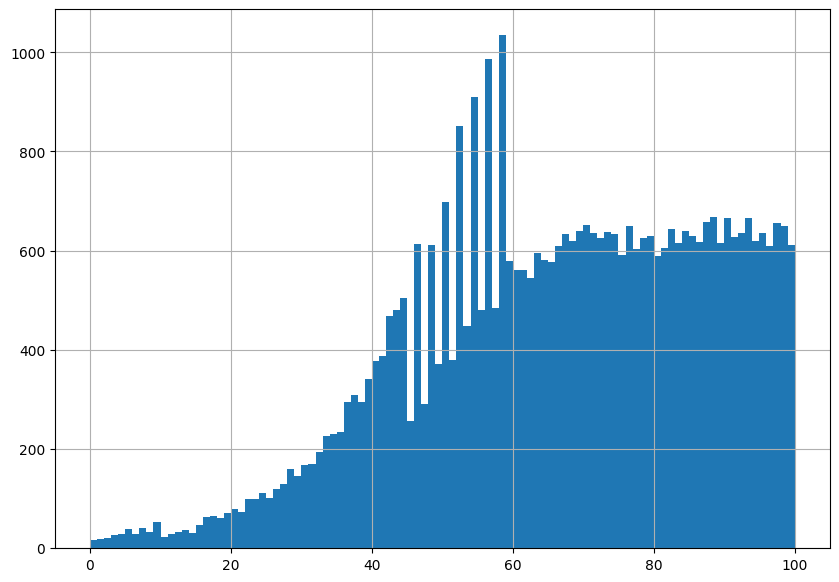

In [10]:
plt.figure(figsize=(10, 7))
plt.hist(time_set, bins=100)
plt.grid()
plt.show()

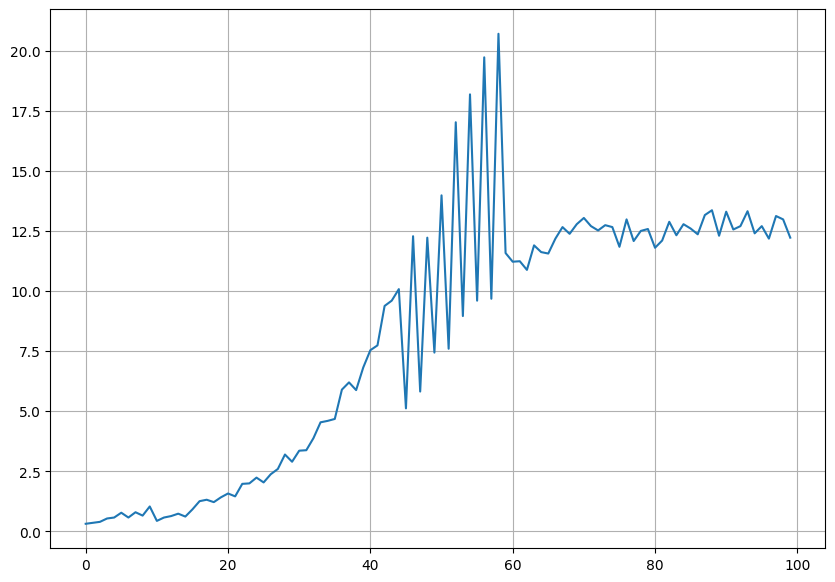

In [11]:
plt.figure(figsize=(10, 7))
hist = np.histogram(time_set, bins=100)[0] * 0.02
plt.plot(hist)
plt.grid()
plt.show()

In [12]:
s = time()
ime_set_exp = thinning(100, _type='exp', attenuation=True)
e = time()

print(e-s)

0
1.0216553019174264
2.0066861342152476
3.0068627103887473
4.046629735116847
5.05167817263024
6.0573919583158995
7.042357466004731
8.022115142921631
9.018287979204855
10.018560863875264
11.020298440584702
12.00693987125863
13.02628638409642
14.012457749884518
15.01031670687565
16.00712388803845
17.003144349870134
18.001613180596692
19.003199763819918
20.00284782724567
21.00504584397092
22.00144683515863
23.005288850262314
24.00604285094912
25.00901395993261
26.00606762296102
27.00350775367098
28.00395677979546
29.000329359165455
30.001403861372484
31.001323800491445
32.00173033990917
33.00036790261051
34.00081824734361
35.00215947502894
36.001321081394885
37.00128257400843
38.002514866547614
39.00069355227536
40.00119172298113
41.00203818578382
42.002735438609854
43.001383478303055
44.017992667799405
45.00182396064371
46.00051281662383
47.001500627082365
48.00144945602279
49.000097060717515
50.000335988223256
51.00331229767038
52.003420805721724
53.000354519543
54.000957525035695
55.00

In [13]:
#plt.figure(figsize=(10, 7))
#plt.step(list(time_set), list(d.values()), marker='.')
#plt.step(list(time_set_exp), list(d_exp.values()), marker='.')
#plt.grid()
#plt.show()

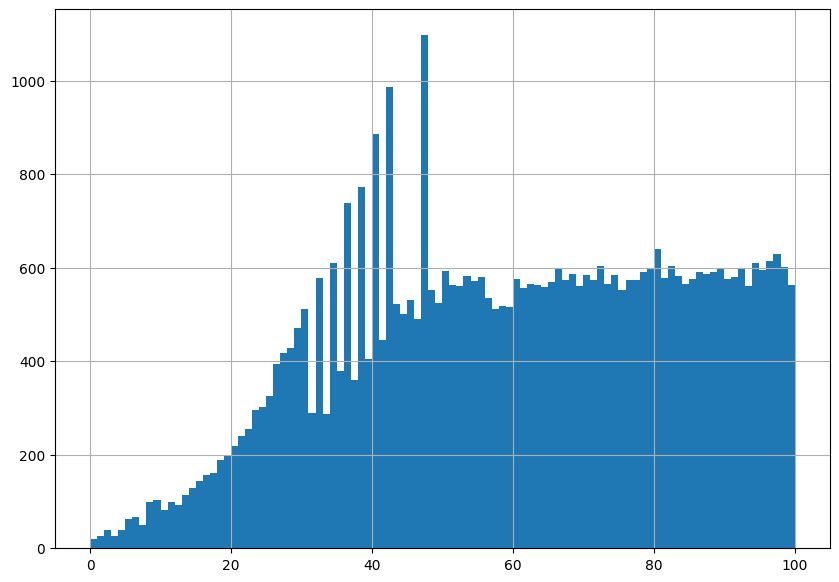

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(ime_set_exp, bins=100)
plt.grid()
plt.show()

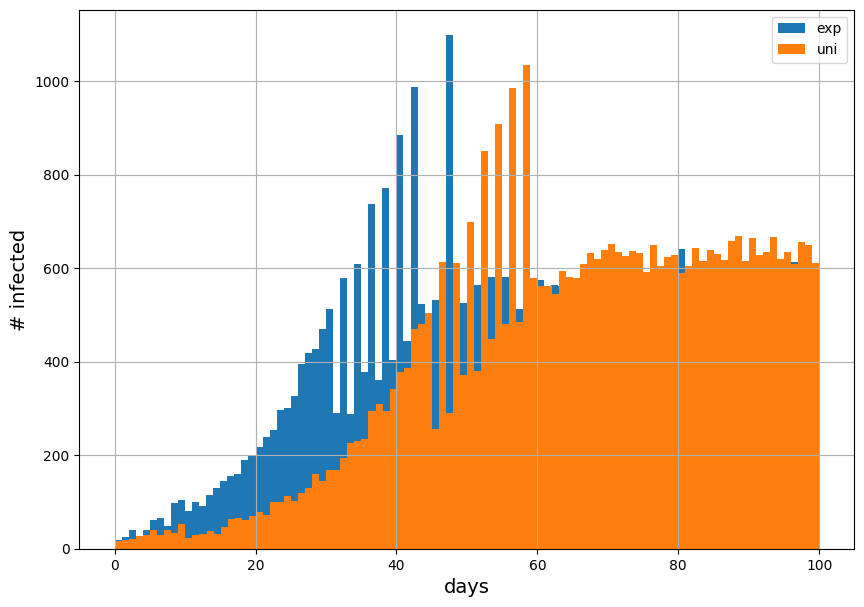

In [15]:
plt.figure(figsize=(10, 7))
plt.hist(ime_set_exp, bins=100, label='exp')
plt.hist(time_set, bins=100, label='uni')
plt.grid()
plt.legend()
plt.xlabel('days', fontsize=14)
plt.ylabel('# infected', fontsize=14)
plt.show()

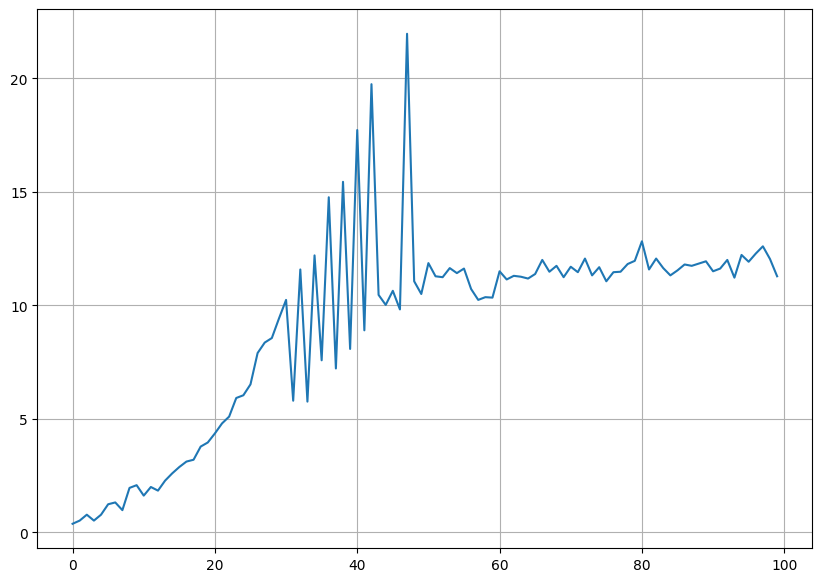

In [16]:
plt.figure(figsize=(10, 7))
hist = np.histogram(ime_set_exp, bins=100)[0] * 0.02
plt.plot(hist)
plt.grid()
plt.show()